In [2]:
import json

from helpers.dataset import get_dataset

from helpers.dataset import MUFFIN_TASK, CUSTOM_TASKS, CROSS_TASK_TASKS

import tiktoken

def count_tokens(text, model="gpt-4"):
    encoding = tiktoken.encoding_for_model(model)
    n_tokens = len(encoding.encode(text))
    return n_tokens

### find the largest (token-wise) tutorial
all_tasks = CUSTOM_TASKS + [MUFFIN_TASK] + CROSS_TASK_TASKS
max_token_tutorial = 0
for task in all_tasks:
    dataset = get_dataset(task)
    for tutorial in dataset:
        total_tokens = 0
        for script in tutorial["transcript"]:
            text = script["text"]
            start = script["start"]
            end = script["end"]
            cur_line = json.dumps({
                "piece_id": "[SS12345]",
                "label_id": "][[]]label[][][]",
                "content": text,
                "start": start,
                "end": end,
                "subtype": "Opening",
                "type": "LOLOL"
            })
            total_tokens += count_tokens(cur_line)
        max_token_tutorial = max(max_token_tutorial, total_tokens)
print(max_token_tutorial)


32416


In [1]:
import json
from pydantic import BaseModel, Field
from pydantic.json_schema import model_json_schema

class Script(BaseModel):
    piece_id: str = Field(..., description="The unique identifier for the script piece")
    label_id: str = Field(..., description="The unique identifier for the label")
    content: str = Field(..., description="The content of the script piece")
    start: float = Field(..., description="The start time of the script piece")

json_str = model_json_schema(Script)
print(json.dumps(json_str, indent=2))

{
  "properties": {
    "piece_id": {
      "description": "The unique identifier for the script piece",
      "title": "Piece Id",
      "type": "string"
    },
    "label_id": {
      "description": "The unique identifier for the label",
      "title": "Label Id",
      "type": "string"
    },
    "content": {
      "description": "The content of the script piece",
      "title": "Content",
      "type": "string"
    },
    "start": {
      "description": "The start time of the script piece",
      "title": "Start",
      "type": "number"
    }
  },
  "required": [
    "piece_id",
    "label_id",
    "content",
    "start"
  ],
  "title": "Script",
  "type": "object"
}


In [18]:
import itertools

ingredients = [
    "rolled oats",
    "1/2 cup flour",
    "1/2 cup brown sugar",
    "roasted pumpkin seeds",
    "softened butter"
]

def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

template = "In a small bowl, add {}, then {}, then {}, then {}, and finally {}."

permutations = itertools.permutations(range(len(ingredients)), len(ingredients))

texts = []
for p in permutations:
    cur_template = template.format(*[ingredients[i] for i in p])
    texts.append(cur_template)


from helpers import perform_embedding
import numpy as np
embedding_method = "openai"

embeddings = perform_embedding(embedding_method, texts)
similarities = np.dot(embeddings, embeddings.T)

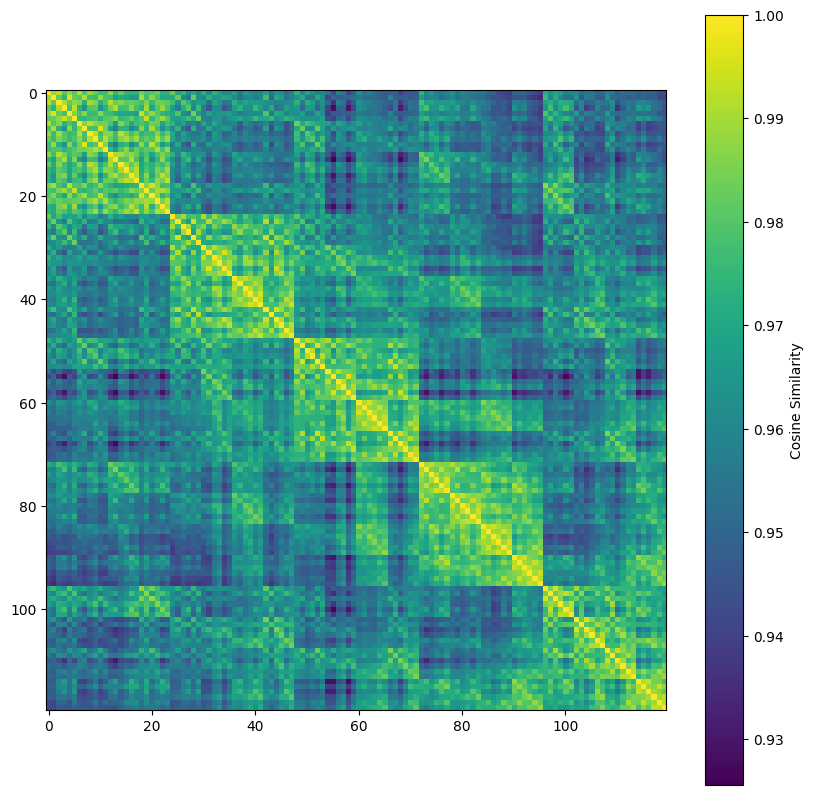

In [19]:
### visualize the embeddings similarities in 2D
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(similarities, cmap='viridis')
plt.colorbar(label='Cosine Similarity')